# 当代量化交易系统原理与实现 期末作业

首先，通过`BacktestDataManager`实现读取数据

In [1]:
from mysystem.data import BacktestDataManager
from mysystem.strategy import ReverseStrategy, CrosssectionStrategy
from mysystem.trade import BacktestTradingSystem
import matplotlib.pyplot as plt


m = BacktestDataManager()
m.load("../data/stk_daily.feather")

使用N日反转策略`ReverseStrategy`生成个股信号（以000002.SZ为例），并利用`BacktestTradingSystem`模拟交易，得到回测结果

In [2]:

data = m.request(['000002.SZ'], "2020-06-01", "2023-09-01", None)
backtest = BacktestTradingSystem(margin=0, max_position=0.2)
strategy = ReverseStrategy(5)
signal = strategy.signal(data ) * 1e6
result = backtest.run(data, signal)

backtest.analysis(result)

,Evaluate
Annual Return,-0.047538
Extra Return,-0.077538
Annual Volatility,0.050931
Sharpe Ratio,-1.522401
Maximum Drawdown,0.139830


此外，还实现了横截面策略`CrosssectionStrategy`，该策略使用一个基准策略生成信号，并比较其他股票的信号得到新的信号

In [3]:

crosssection_data = m.request(m.data['stk_id'].unique()[:100], "2020-06-01", "2023-09-01", None)
backtest = BacktestTradingSystem(margin=0, max_position=0.2)

base_strategy = ReverseStrategy(5)
crosssection_strategy = CrosssectionStrategy(base_strategy)
crosssection_signal = crosssection_strategy.signal(crosssection_data ) * 1e6
crosssection_result = backtest.run(crosssection_data, crosssection_signal)

backtest.analysis(crosssection_result)

,Evaluate
Annual Return,0.001144
Extra Return,-0.028856
Annual Volatility,0.051122
Sharpe Ratio,-0.564455
Maximum Drawdown,0.075917


最终，比较两个策略的净值曲线，发现横截面策略提高了策略的收益水平

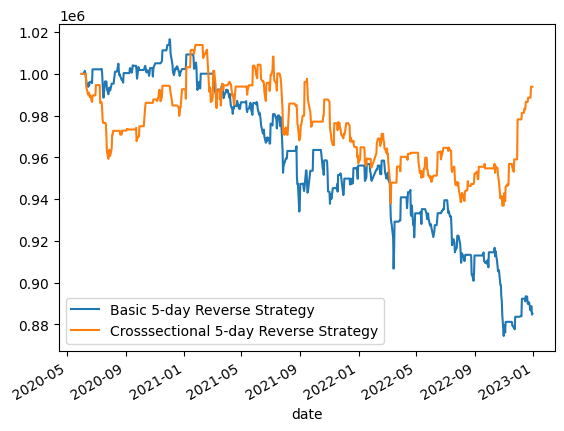

In [4]:
result.plot()
crosssection_result.plot()

plt.legend(['Basic 5-day Reverse Strategy', 'Crosssectional 5-day Reverse Strategy', ]);